<h3><center><b>Свирин Максим Сергеевич | Б19-501</b></center></h3>

<center>Будем искать численное решение уравнения теплопроводности:</center>

$$
\begin{cases}
\frac{\partial u}{\partial t}=\frac{\partial}{\partial x}\left[\lambda(u)\frac{\partial u}{\partial x}\right]
\\
u(x,0)=0
\\
u(0, t)=u_0t^K
\\
u(l, t)=0
\end{cases}
$$

где $\lambda(u)=u^N$, $x>0$, $t>0$.

---

<center>Для решения будет использована неявная схема:</center><br/>


$$
\begin{cases}
\frac{u_k^{n+1} - u_k^n}{\tau} = \frac{1}{2h^2} \bigg(\Big( \lambda(u_{k+1}^{n+1}) + \lambda(u_{k}^{n+1}) \Big) \Big( u_{k+1}^{n+1} - u_{k}^{n+1} \Big) - \Big( \lambda(u_{k}^{n+1}) + \lambda(u_{k-1}^{n+1}) \Big) \Big( u_{k}^{n+1} - u_{k-1}^{n+1} \Big) \bigg) 
\\
u_{k}^{0}=0
\\
u_{0}^{n}=u_0(t_n)^K=u_0(n\tau)^K
\end{cases}
$$

Первое уравнение будем решать методом итераций:

$$\frac{u_k^{i+1} - u_k^n}{\tau} = \frac{1}{2h^2} \bigg(\Big( \lambda(u_{k+1}^{i}) + \lambda(u_{k}^{i}) \Big) \Big( u_{k+1}^{i+1} - u_{k}^{i+1} \Big) - \Big( \lambda(u_{k}^{i}) + \lambda(u_{k-1}^{i}) \Big) \Big( u_{k}^{i+1} - u_{k-1}^{i+1} \Big) \bigg)$$ 

где $u_k^{i=0} = u_k^n$<br/>
$i$ пусть пробегает от 0 до 3.

Проведём некоторые преобразования и получим:

$$
\begin{cases}
u_{k+1}^{i+1}\left[ \frac{\tau}{2h^2} \left( \lambda(u_{k+1}^{i}) + \lambda(u_{k}^{i}) \right) \right] + u_{k}^{i+1} \left[ \frac{\tau}{2h^2} \left( \lambda(u_{k+1}^{i}) - \lambda(u_{k-1}^{i}) \right) - 1\right] + u_{k-1}^{i+1} \left[ \frac{\tau}{2h^2} \left( \lambda(u_{k}^{i}) + \lambda(u_{k-1}^{i}) \right) \right] = - u_{k}^{n} 
\\
u_{k}^{0}=0
\\
u_{0}^{n}=u_0(t_n)^K=u_0(n\tau)^K
\end{cases}
$$

---

Переобозначим коэффициенты:

Для $k=\overline{1,M-1}$:
$$
\begin{cases}
a_k = \frac{\tau}{2h^2} \left( \lambda(u_{k+1}^{i}) + \lambda(u_{k}^{i}) \right)
\\
b_k = -\frac{\tau}{2h^2} \left( \lambda(u_{k+1}^{i}) + 2\lambda(u_{k}^{i}) + \lambda(u_{k-1}^{i}) \right) - 1
\\
c_k = \frac{\tau}{2h^2} \left( \lambda(u_{k}^{i}) + \lambda(u_{k-1}^{i}) \right)
\\
d_k = - u_{k}^{n}
\end{cases}
$$

Для остальных k:
$$
\begin{cases}
a_0 = 0
\\
b_0 = - \frac{\alpha_{1}}{h} + \beta_{1}
\\
c_0 = \frac{\alpha_{1}}{h}
\\
d_0 = \gamma_{1}
\\
a_M = - \frac{\alpha_{2}}{h}
\\
b_M = \frac{\alpha_{2}}{h} + \beta_{2}
\\
c_M = 0
\\
d_M = \gamma_{2}
\end{cases}
$$

После переобозначения имеем:
$$
\begin{cases}
u_{k+1}^{i+1} a_k + u_{k}^{i+1} b_k + u_{k-1}^{i+1} c_k = d_k \qquad  k=\overline{1,M-1} \qquad  i=\overline{0, 3}
\\
u_{k}^{0}=\phi_{k}
\\
u_{0}^{n+1} b_0 + u_{1}^{n+1} c_0 = d_0
\\
u_{M-1}^{n+1} a_M + u_{0}^{n+1} b_M = d_M

\end{cases}
$$

---

Составим матрицу из полученных уравнений:

$$\begin{pmatrix}
b_0 & c_0 & & & \\
a_1 & b_1 & c_1 & & \\
& a_2 & \ddots & \ddots & \\
& & \ddots & \ddots & c_{M-1} \\
& & & a_M & b_M \\
\end{pmatrix}
\begin{pmatrix}
u_0^{n+1} \\
u_1^{n+1} \\
u_2^{n+1} \\
\dots \\
u_M^{n+1}
\end{pmatrix}
=
\begin{pmatrix}
d_0 \\
d_1 \\
d_2 \\
\dots \\
d_M
\end{pmatrix}$$

Мы имеем $N$ систем уравнений $(M+1) \times (M+1)$

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import math
import plotly.graph_objects as gr
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib widget

Аналитическое решение:

In [2]:
# Параметры уравнения
N   = 13/2
K   = 0
u0  = 1.25

# Параметр X уравнения
hi  = 1

# Ось ox:
h   = 0.05
l   = 5

N_x = int(l / h)+1
X   = np.linspace(0, l, num=N_x)
x_plot = X
# Ось oy:
t_max = 12
dt  = 0.05

N_y = int(t_max / dt) + 1
T   = np.linspace(0, t_max, num=N_y)
t_plot = T
# Граничные условия:
A1  = 0
B1  = 1
C1  = lambda t: u0 * t**K

A2  = 0
B2  = 1
C2  = lambda t: 0

# Lambda(u):
def lmb(u):
    return u**N

# Начального условия:
def phi(x):
    return 0.0

In [3]:
class Analytical_Solution:
    
    def __init__(self, hi=1):

        self.alpha = 0.573740

        self.hi = hi
        self.N = 13/2
        self.u0 = 1.25
        self.K = 0

        self.arguments = [self.hi, self.u0, self.N, self.K]

        return

    def evaluate(self, x, t):
        
        hi, u0, N, K = self.arguments 
        alpha = self.alpha

        result = 0
        f_value = 0

        if x == 0 and t != 0:
            f_value = 1
        elif t == 0:
            f_value = 0
        else:
            z0 = np.sqrt(hi * u0**N * np.power(t, N*K + 1))
            z = x / z0
            if z <= alpha:
                f_value = 13/4 * alpha * (alpha - z) - 13/60 * (alpha - z)**2 + 169/37800 * (alpha - z)**3 / alpha + 3211/46494000 * (alpha - z)**4 / alpha**2 - 42757/73228050000 * (alpha - z)**5 / alpha**3 - 36954047/441565141500000*(alpha - z)**6 / alpha**4

        result = u0 * t**K * np.power(f_value, 1/N)

        return result

Зададим функции, парамтеры и постоянные, используемые в уравнении:

Напишем алгоритм решения системы уравнений с тридиагональной матрицей:

In [4]:
def TridiagMatrixCourse(A, B, C, D):

    NUM = len(D)
    AA = []
    BB = []

    AA.append(-C[0] / B[0])
    BB.append(D[0] / B[0])
    
    for i in range(1, NUM):
        AA.append(-C[i] / (B[i] + A[i] * AA[i-1]))
        BB.append((D[i] - A[i]*BB[i-1]) / (B[i] + A[i] * AA[i-1]))
    
    y = []
    y.append(BB[NUM-1])

    for i in range(NUM-2, -1, -1):
        y0 = BB[i] + AA[i] * y[0]
        y.insert(0, y0)

    return y

In [5]:
def TridiagMatrixCoefficients(X, dt, curr_t, curr_iter_layer, prev_layer, hi=1, u0=u0, N=N, K=K):
    
    h = X[1] - X[0]
    NUM = len(X)

    A = []
    B = []
    C = []
    D = []

    A.append(0)
    B.append(1)
    C.append(0)
    D.append(u0 * curr_t**K)

    c = dt / (2 * h * h)

    for k in range(1, NUM-1):
        A.append( c * hi * (curr_iter_layer[k  ]**N + curr_iter_layer[k-1]**N) )
        B.append(-c * hi * (curr_iter_layer[k+1]**N + 2*curr_iter_layer[k]**N + curr_iter_layer[k-1]**N) - 1 )
        C.append( c * hi * (curr_iter_layer[k+1]**N + curr_iter_layer[k  ]**N) )
        D.append(-prev_layer[k] )

    A.append(0)
    B.append(1)
    C.append(0)
    D.append(0)

    return A, B, C, D


Численное решение:

In [6]:
def TridiagMatrixMethodSolution(X, T, hi=1, u0=u0, N=N, K=K):
    
    dt  = T[1] - T[0]
    u   = []

    first_layer = [phi(x) for x in X]
    u.append(first_layer)

    curr_iter_layer = first_layer
    prev_layer      = first_layer

    for curr_t in T[1:]:
        for j in range(5):
            A, B, C, D = TridiagMatrixCoefficients(X, dt, curr_t, curr_iter_layer, prev_layer, hi=hi, u0=u0, N=N, K=K)

            curr_iter_layer = TridiagMatrixCourse(A, B, C, D)

        prev_layer = curr_iter_layer
        u.append(curr_iter_layer)

    return u

Сделаем визуализацию решения:

In [7]:
def plot_u(X=X, T=T, hi=hi, u0=u0, N=N, K=K):

  Xs, Ts = np.meshgrid(X, T)
  u = TridiagMatrixMethodSolution(X, T, hi, u0, N, K)

  sol = Analytical_Solution()
  real = []
  for t in T:
    real.append([sol.evaluate(x, t) for x in X])
  
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(projection='3d')
  ax.set_xlabel('x')
  ax.set_ylabel('t')
  ax.set_zlabel('u(x,t)')
  ax.title.set_text("Полученное и оригинальное решения")
  ax.plot_surface(Xs, Ts, np.array(real), color="purple", alpha=0.99, label="Real")
  ax.plot_surface(Xs, Ts, np.array(u), color="yellow", alpha=0.75, label="Calc")

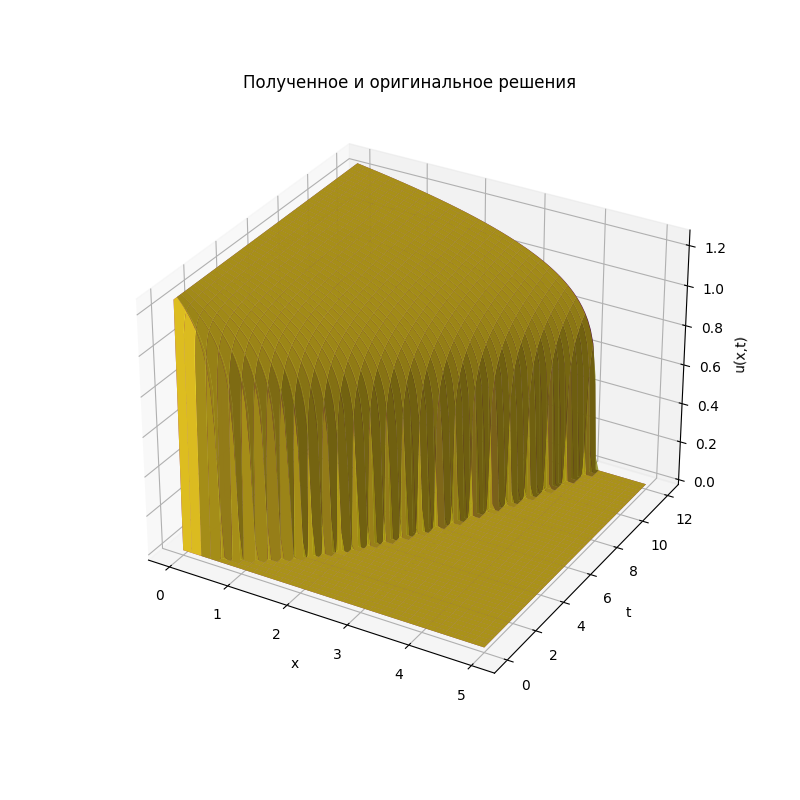

In [8]:
plot_u()

Далее приведена реализация построения 2D графиков.

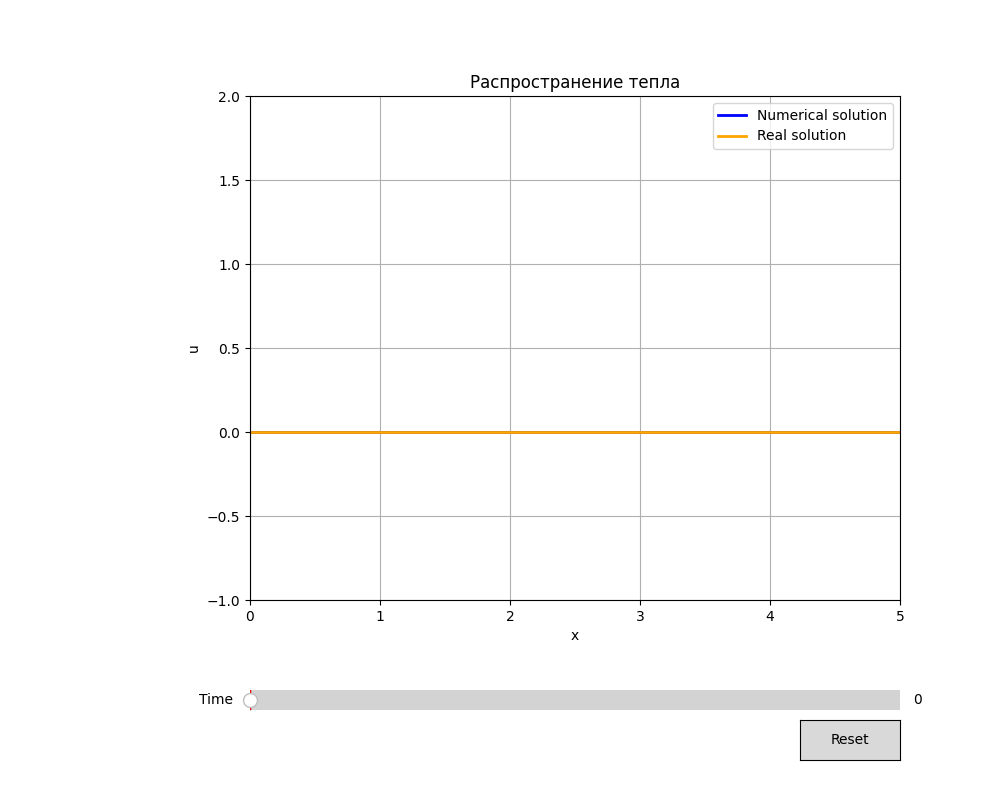

In [9]:
def update(val):
    ydata1 = u[int(np.where(t_plot == val)[0])]
    ydata2 = a_u[int(np.where(t_plot == val)[0])]
    line1.set_ydata(ydata1)
    line2.set_ydata(ydata2)
    fig.canvas.draw_idle()

def reset(event):
    time_slider.reset()

u = TridiagMatrixMethodSolution(X, T, hi, u0, N, K)

solution = Analytical_Solution()
a_u = []
for t in T:
    a_u.append([solution.evaluate(x, t) for x in X])

fig, ax  = plt.subplots()
fig.set_size_inches(10, 8, forward=True)

line1,   = plt.plot(x_plot, u[0],    lw = 2, color = 'blue',   label='Numerical solution')
line2,   = plt.plot(x_plot, a_u[0],  lw = 2, color = 'orange', label='Real solution')

plt.xlim(0, l)
plt.ylim(-1, 2)
plt.grid(True)

plt.subplots_adjust(left = 0.25, bottom = 0.25)

ax_time = plt.axes([0.25, 0.1, 0.65, 0.05])
time_slider = Slider(
    ax      = ax_time,
    label   = 'Time ',
    valmin  = 0,
    valmax  = t_max,
    valinit = 0,
    valstep = dt,
    color   = 'gray'
)

time_slider.on_changed(update)


resetax = plt.axes([0.8, 0.05, 0.1, 0.05])
button  = Button(resetax, 'Reset', hovercolor='0.9')

button.on_clicked(reset)


ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title("Распространение тепла")

ax.legend()

plt.show()

In [20]:
from IPython.display import display, clear_output
from matplotlib.animation import FuncAnimation

def plot_2D_auto():

    global X
    global T

    m = len(T)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.grid(True)
    p, = ax.plot(0, 0, label="Numerical solution")
    p_orig, = ax.plot(0, 0, label="Analytical solution")
    plt.axis([-h, l+h, -1, 3])
    plt.legend()
    
    u = TridiagMatrixMethodSolution(X, T, hi, u0, N, K)
    solution = Analytical_Solution()
    a_u = []
    for t in T:
        a_u.append([solution.evaluate(x, t) for x in X])

    # Animation Function
    def animate_plot(i):
        p.set_data(X, u[i])
        p_orig.set_data(X, a_u[i])
        return p, p_orig,

    ani = FuncAnimation(fig,
                        animate_plot,
                        frames=len(T)-3,
                        interval=100)

    ani.save('animation.gif', fps=240)

MovieWriter ffmpeg unavailable; using Pillow instead.


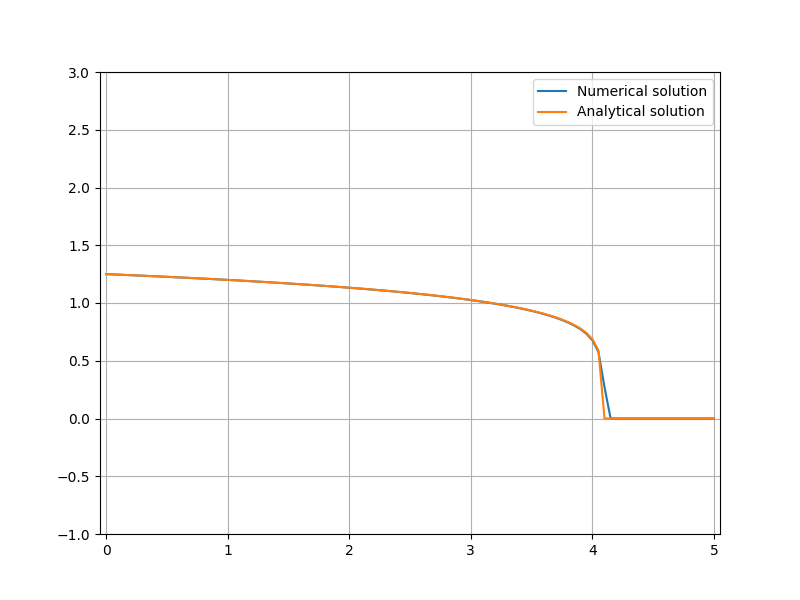

In [21]:
plot_2D_auto()